In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

In [5]:
dataset = pd.read_csv('cleaned_dataset_27_10_2025.csv')


/var/folders/f9/r3jzkwln4cv46vmsq86955mm0000gn/T/ipykernel_81824/1378026230.py:1: DtypeWarning: Columns (14,35) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('cleaned_dataset_27_10_2025.csv')


In [6]:
#check if request == response
dataset['check_first_location'] = dataset['Aanvraag_Eerste_Locatie_Dienstregelpunt'] == dataset['Reactie_Eerste_Activiteit_Dienstregelpunt']
dataset['check_second_location'] = dataset['Aanvraag_Laatste_Locatie_Dienstregelpunt'] == dataset['Reactie_Laatste_Activiteit_Dienstregelpunt']
dataset['check_weight'] = dataset['Aanvraag_Eerste_Locatie_MaxGewicht'] == dataset['Reactie_Eerste_Activiteit_MaxGewicht']
dataset['check_length'] = dataset['Aanvraag_Eerste_Locatie_MaxLengte'] == dataset['Reactie_Eerste_Activiteit_MaxLengte']
dataset['check_speed'] = dataset['Aanvraag_Eerste_Locatie_MaxSnelheid'] == dataset['Reactie_Eerste_Activiteit_MaxSnelheid']
dataset['check_first_departure_time'] = dataset['Aanvraag_Eerste_Locatie_Vroegste_Vertrektijd'] == dataset['Reactie_Eerste_Activiteit_Tijdstip']
dataset['check_last_arrival_time'] = dataset['Aanvraag_Laatste_Locatie_Laatste_Aankomsttijd'] == dataset['Reactie_Laatste_Activiteit_Tijdstip']
dataset['check_stops'] = dataset['Number_Of_Stops_requested'] == dataset['Number_Of_Stops_response']

In [6]:
#Test the quality of the data, are there huge outliers? Specified for weight, length and speed

print(f"median gewicht req =   {dataset['Aanvraag_Eerste_Locatie_MaxGewicht'].median()}")
print(f"25% gewicht req =      {dataset['Aanvraag_Eerste_Locatie_MaxGewicht'].quantile(0.25)}")
print(f" 75% gewicht req =     {dataset['Aanvraag_Eerste_Locatie_MaxGewicht'].quantile(0.75)}")
print(f" 95% gewicht req =     {dataset['Aanvraag_Eerste_Locatie_MaxGewicht'].quantile(0.95)}")
print(f"median gewicht resp =  {dataset['Reactie_Eerste_Activiteit_MaxGewicht'].median()}")
print(f"25% gewicht resp =     {dataset['Reactie_Eerste_Activiteit_MaxGewicht'].quantile(0.25)}")
print(f" 75% gewicht resp =    {dataset['Reactie_Eerste_Activiteit_MaxGewicht'].quantile(0.75)}")
print(f" 95% gewicht resp =    {dataset['Reactie_Eerste_Activiteit_MaxGewicht'].quantile(0.95)}")
print("-----------------------")
print(f"median length req =      {dataset['Aanvraag_Eerste_Locatie_MaxLengte'].median()}")
print(f"25% length req =         {dataset['Aanvraag_Eerste_Locatie_MaxLengte'].quantile(0.25)}")
print(f" 75% length req =        {dataset['Aanvraag_Eerste_Locatie_MaxLengte'].quantile(0.75)}")
print(f" 95% length req =        {dataset['Aanvraag_Eerste_Locatie_MaxLengte'].quantile(0.95)}")
print(f"median length resp =     {dataset['Reactie_Eerste_Activiteit_MaxLengte'].median()}")
print(f"25% length resp =        {dataset['Reactie_Eerste_Activiteit_MaxLengte'].quantile(0.25)}")
print(f" 75% length resp =       {dataset['Reactie_Eerste_Activiteit_MaxLengte'].quantile(0.75)}")
print(f" 97,5% length resp =       {dataset['Reactie_Eerste_Activiteit_MaxLengte'].quantile(0.95)}")
print("-----------------------")
print(f"median speed req =    {dataset['Aanvraag_Eerste_Locatie_MaxSnelheid'].median()}")
print(f"25% speed req =       {dataset['Aanvraag_Eerste_Locatie_MaxSnelheid'].quantile(0.25)}")
print(f" 75% speed req =      {dataset['Aanvraag_Eerste_Locatie_MaxSnelheid'].quantile(0.75)}")
print(f" 95% speed req =      {dataset['Aanvraag_Eerste_Locatie_MaxSnelheid'].quantile(0.95)}")
print(f"median speed resp =   {dataset['Reactie_Eerste_Activiteit_MaxSnelheid'].median()}")
print(f"25% speed resp =      {dataset['Reactie_Eerste_Activiteit_MaxSnelheid'].quantile(0.25)}")
print(f" 75% speed resp =     {dataset['Reactie_Eerste_Activiteit_MaxSnelheid'].quantile(0.75)}")
print(f" 95% speed resp =     {dataset['Reactie_Eerste_Activiteit_MaxSnelheid'].quantile(0.95)}")

print('As shown in the boxplot the mayority of the values is lower, the outliers will be removed so that the data becomes more valuable')

median gewicht req =   90.0
25% gewicht req =      85.0
 75% gewicht req =     400.0
 95% gewicht req =     1600.0
median gewicht resp =  90.0
25% gewicht resp =     85.0
 75% gewicht resp =    400.0
 95% gewicht resp =    1600.0
-----------------------
median length req =      20.0
25% length req =         18.0
 75% length req =        200.0
 95% length req =        633.0
median length resp =     20.0
25% length resp =        18.0
 75% length resp =       200.0
 97,5% length resp =       634.0
-----------------------
median speed req =    100.0
25% speed req =       100.0
 75% speed req =      100.0
 95% speed req =      140.0
median speed resp =   100.0
25% speed resp =      95.0
 75% speed resp =     100.0
 95% speed resp =     140.0
As shown in the boxplot the mayority of the values is lower, the outliers will be removed so that the data becomes more valuable


{'whiskers': [<matplotlib.lines.Line2D at 0x11712fa50>,
 'caps': [<matplotlib.lines.Line2D at 0x117141250>,
 'boxes': [<matplotlib.lines.Line2D at 0x11712eed0>],
 'medians': [<matplotlib.lines.Line2D at 0x117142a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1171434d0>],
 'means': []}

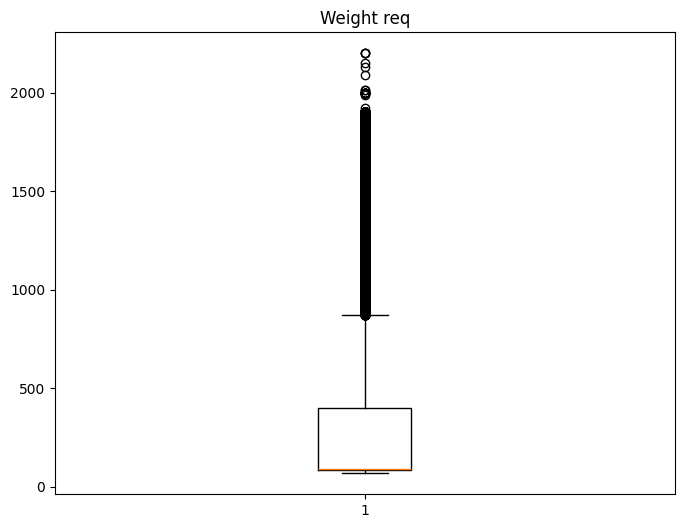

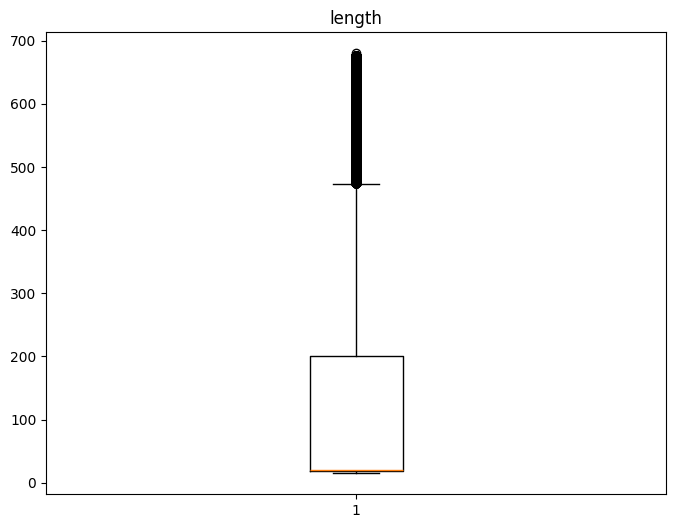

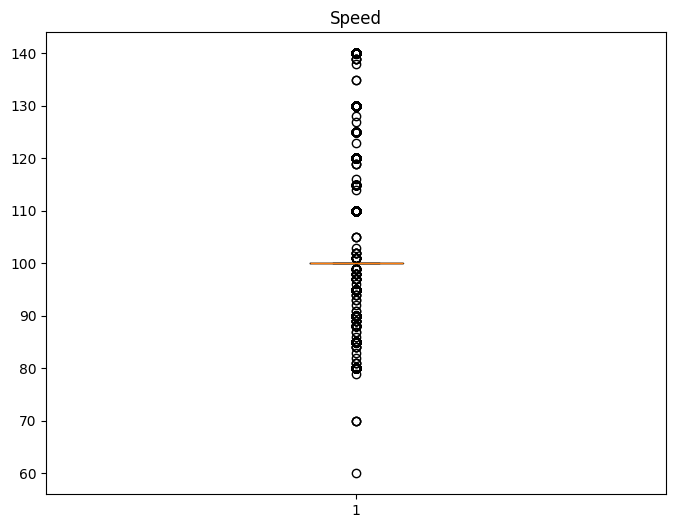

In [7]:
#Remove outliers for each feature such that only the 95% most occuring values are taken into account 
dataset = dataset[
    dataset['Aanvraag_Eerste_Locatie_MaxGewicht'].between(
        dataset['Aanvraag_Eerste_Locatie_MaxGewicht'].quantile(0.025),
        dataset['Aanvraag_Eerste_Locatie_MaxGewicht'].quantile(0.975))
    &
    dataset['Aanvraag_Eerste_Locatie_MaxLengte'].between(
        dataset['Aanvraag_Eerste_Locatie_MaxLengte'].quantile(0.025),
        dataset['Aanvraag_Eerste_Locatie_MaxLengte'].quantile(0.975))
    &
    dataset['Aanvraag_Eerste_Locatie_MaxSnelheid'].between(
        dataset['Aanvraag_Eerste_Locatie_MaxSnelheid'].quantile(0.025),
        dataset['Aanvraag_Eerste_Locatie_MaxSnelheid'].quantile(0.975))
    &
    dataset['Reactie_Eerste_Activiteit_MaxGewicht'].between(
        dataset['Reactie_Eerste_Activiteit_MaxGewicht'].quantile(0.025),
        dataset['Reactie_Eerste_Activiteit_MaxGewicht'].quantile(0.975))
    &
    dataset['Reactie_Eerste_Activiteit_MaxLengte'].between(
        dataset['Reactie_Eerste_Activiteit_MaxLengte'].quantile(0.025),
        dataset['Reactie_Eerste_Activiteit_MaxLengte'].quantile(0.975))
    &
    dataset['Reactie_Eerste_Activiteit_MaxSnelheid'].between(
        dataset['Reactie_Eerste_Activiteit_MaxSnelheid'].quantile(0.025),
        dataset['Reactie_Eerste_Activiteit_MaxSnelheid'].quantile(0.975))]

dataset = dataset.reset_index(drop=True)

#plot datapoints in a boxplot
plt.figure(figsize=(8,6))
plt.title('Weight req')
plt.boxplot(dataset['Aanvraag_Eerste_Locatie_MaxGewicht'].dropna(), vert=True)

plt.figure(figsize=(8,6))
plt.title('length')
plt.boxplot(dataset['Aanvraag_Eerste_Locatie_MaxLengte'].dropna(), vert=True)

plt.figure(figsize=(8,6))
plt.title('Speed')
plt.boxplot(dataset['Aanvraag_Eerste_Locatie_MaxSnelheid'].dropna(), vert=True)




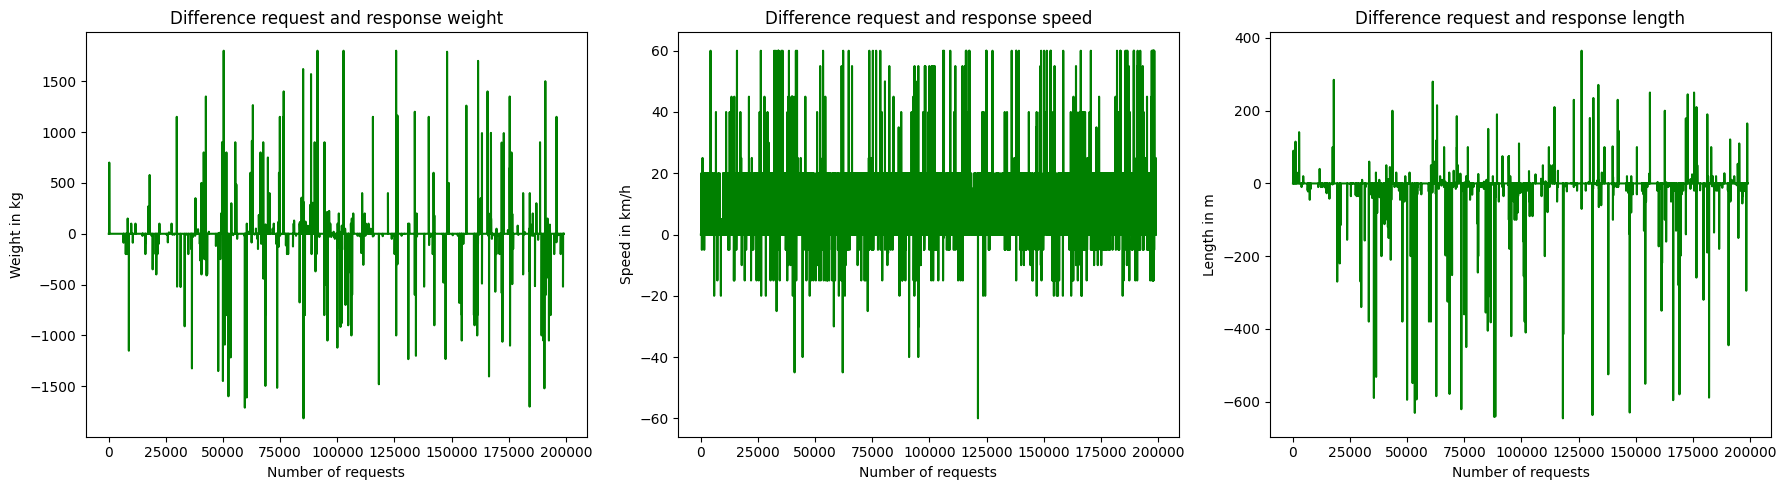

0.08 of the Weight responses are lower than request
99.81 of the Weight responses are equal to request
0.11 of the Weight responses are higher than request
---------------------
2.67 of the Speed responses are lower than request
97.15 of the Speed responses are equal to request
0.18 of the Speed responses are higher than request
---------------------
0.06 of the Length responses are lower than request
99.77 of the Length responses are equal to request
0.17 of the Length responses are higher than request


In [8]:
#Calculate absolute differences between request and response
#Negative difference means that ProRail wants a higher value than is requested by the operator
dataset['diff_weight'] = dataset['Aanvraag_Eerste_Locatie_MaxGewicht'] - dataset['Reactie_Eerste_Activiteit_MaxGewicht']
dataset['diff_length'] = dataset['Aanvraag_Eerste_Locatie_MaxLengte'] - dataset['Reactie_Eerste_Activiteit_MaxLengte']
dataset['diff_speed'] = dataset['Aanvraag_Eerste_Locatie_MaxSnelheid'] - dataset['Reactie_Eerste_Activiteit_MaxSnelheid']

#Plot absolute differences 
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 rij, 3 kolommen

#diff_weight
axes[0].plot(dataset['diff_weight'], color='g')
axes[0].set_title('Difference request and response weight')
axes[0].set_ylabel('Weight in kg')
axes[0].set_xlabel('Number of requests')
#diff_speed
axes[1].plot(dataset['diff_speed'], color='g')
axes[1].set_title('Difference request and response speed')
axes[1].set_ylabel('Speed in km/h')
axes[1].set_xlabel('Number of requests')

#diff_length
axes[2].plot(dataset['diff_length'], color='g')
axes[2].set_title('Difference request and response length')
axes[2].set_ylabel('Length in m')
axes[2].set_xlabel('Number of requests')

plt.tight_layout()
plt.show()

count_larger_zero = (dataset['diff_weight'] > 0).sum()
count_zero = (dataset['diff_weight'] == 0).sum()
count_smaller_zero = (dataset['diff_weight'] < 0).sum()
print(f'{(count_larger_zero/ (count_larger_zero+count_zero+count_smaller_zero))*100:.2f} of the Weight responses are lower than request')
print(f'{(count_zero/ (count_larger_zero+count_zero+count_smaller_zero))*100:.2f} of the Weight responses are equal to request')
print(f'{(count_smaller_zero/ (count_larger_zero+count_zero+count_smaller_zero))*100:.2f} of the Weight responses are higher than request')
print('---------------------')
count_larger_zero_s = (dataset['diff_speed'] > 0).sum()
count_zero_s = (dataset['diff_speed'] == 0).sum()
count_smaller_zero_s = (dataset['diff_speed'] < 0).sum()
print(f'{(count_larger_zero_s/ (count_larger_zero_s+count_zero_s+count_smaller_zero_s))*100:.2f} of the Speed responses are lower than request')
print(f'{(count_zero_s/ (count_larger_zero_s+count_zero_s+count_smaller_zero_s))*100:.2f} of the Speed responses are equal to request')
print(f'{(count_smaller_zero_s/ (count_larger_zero_s+count_zero_s+count_smaller_zero_s))*100:.2f} of the Speed responses are higher than request')
print('---------------------')
count_larger_zero_l = (dataset['diff_length'] > 0).sum()
count_zero_l = (dataset['diff_length'] == 0).sum()
count_smaller_zero_l = (dataset['diff_length'] < 0).sum()
print(f'{(count_larger_zero_l/ (count_larger_zero_l+count_zero_l+count_smaller_zero_l))*100:.2f} of the Length responses are lower than request')
print(f'{(count_zero_l/ (count_larger_zero_l+count_zero_l+count_smaller_zero_l))*100:.2f} of the Length responses are equal to request')
print(f'{(count_smaller_zero_l/ (count_larger_zero_l+count_zero_l+count_smaller_zero_l))*100:.2f} of the Length responses are higher than request')



In [16]:
aantal_false_1 = (dataset['check_first_location'] == False).sum()
aantal_true_1 = (dataset['check_first_location'] == True).sum()
print(f'{(aantal_false_1/aantal_true_1)*100:.2f} of the requested start locations is not equal to the responded location')

aantal_false_2 = (dataset['check_second_location'] == False).sum()
aantal_true_2 = (dataset['check_second_location'] == True).sum()
print(f'{(aantal_false_2/aantal_true_2)*100:.2f} of the requested end locations is not equal to the responded location')
print('-----------------')


req_resp_punt = dataset[dataset['check_first_location'] == False]
req_resp_punt= req_resp_punt.reset_index(drop=True)

req_resp_punt['Changed location'] = req_resp_punt['Aanvraag_Eerste_Locatie_Dienstregelpunt'] + '-' + req_resp_punt['Reactie_Eerste_Activiteit_Dienstregelpunt']
count = req_resp_punt['Changed location'].value_counts()

for i in range(10):
    print(f' The change {count.index[i]} occurs in {(count.iloc[i]/np.sum(count))*100:.2f} percent of the changed origin locations')
print('-----------------')

req_resp_punt2 = dataset[dataset['check_second_location'] == False]
req_resp_punt2= req_resp_punt2.reset_index(drop=True)

req_resp_punt2['Changed location_2'] = req_resp_punt2['Aanvraag_Laatste_Locatie_Dienstregelpunt'] + '-' + req_resp_punt2['Reactie_Laatste_Activiteit_Dienstregelpunt']
count2 = req_resp_punt2['Changed location_2'].value_counts()

for i in range(10):
    print(f' The change {count2.index[i]} occurs in {(count2.iloc[i]/np.sum(count2))*100:.2f} percent of the changed destination locations')



7.45 of the requested start locations is not equal to the responded location
7.84 of the requested end locations is not equal to the responded location
-----------------
 The change Zvg-Em occurs in 33.85 percent of the changed origin locations
 The change Odzg-Bh occurs in 19.85 percent of the changed origin locations
 The change Vlgr-Kn occurs in 19.09 percent of the changed origin locations
 The change Rsdg-Esn occurs in 7.46 percent of the changed origin locations
 The change Kfhn-Kfhz occurs in 2.67 percent of the changed origin locations
 The change Kfhz-Kfhn occurs in 2.37 percent of the changed origin locations
 The change Edng-Fvs occurs in 1.83 percent of the changed origin locations
 The change Mvtw-Mvtww occurs in 1.20 percent of the changed origin locations
 The change Hang-Hz occurs in 1.14 percent of the changed origin locations
 The change Svgg-Fsz occurs in 1.04 percent of the changed origin locations
-----------------
 The change Zvg-Em occurs in 25.84 percent of the 

 mean request = 2.1575072443388694
 mean response = 12.799950783694337
 median request = 2.0
 median response = 6.0
 max request = 13
 max response = 131.0
 2.8379728908553092 % of the stop request and response are the same


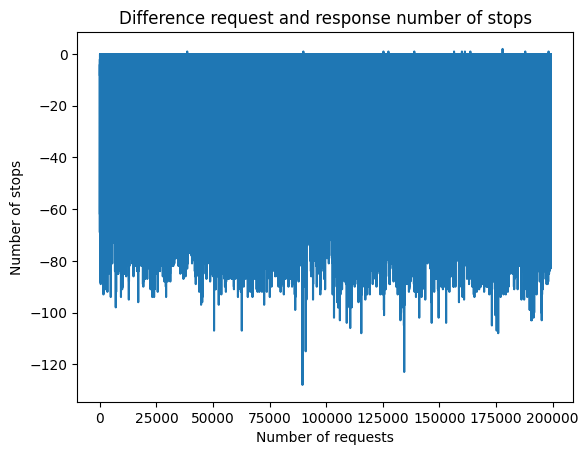

In [7]:
dataset['diff number of stops'] = dataset['Number_Of_Stops_requested'] - dataset['Number_Of_Stops_response']
print(f" mean request = {dataset['Number_Of_Stops_requested'].mean()}")
print(f" mean response = {dataset['Number_Of_Stops_response'].mean()}")
print(f" median request = {dataset['Number_Of_Stops_requested'].median()}")
print(f" median response = {dataset['Number_Of_Stops_response'].median()}")
print(f" max request = {dataset['Number_Of_Stops_requested'].max()}")
print(f" max response = {dataset['Number_Of_Stops_response'].max()}")

plt.figure()
plt.plot(dataset['diff number of stops'])
plt.title('Difference request and response number of stops')
plt.xlabel('Number of requests')
plt.ylabel('Number of stops')

count = (dataset['diff number of stops'] == 0).sum()
print(f" {count/len(dataset['diff number of stops'])*100} % of the stop request and response are the same")
